**Disclaimer: This code was developed after learning from a demonstrative example in one of my Udemy courses. I do not intend to violate any copyright laws; rather, my goal is to demonstrate the skills I acquired through the course and highlight some of the machine learning projects I have completed.**

*Link to the udemy course:https://www.udemy.com/course/deep-learning-machine-learning-practical/learn/lecture/14976608?start=105#overview*

The task is to classify a dataset that is made of different images of dogs, horses, airplanes, birds, cats, trucks, deers,frogs, cars, and ships. The dataset consists of 60,000 images and obtained from the Canadian Institute for Advanced Research (CIFAR-10)

Classes of the images are:
[1] Airplanes
[2] Cars
[3] Birds
[4] Cats
[5] Deer
[6] Dogs
[7] Frogs
[8] Horses
[9] Ships
[10] Trucks



**Importing necessary libraries**

In [3]:
import pandas as pd #pandas can be used for data manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tensorflow.keras.optimizers import RMSprop

**Calling the data**
The dataset can be called directly from the keras library

In [5]:
from keras.datasets import cifar10

**Associating the dataset to training and testing set** (The data set has already been portioned into training and testing sets, we just wanna call them)

In [7]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

**Checking the shape of our datasets**

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

**Data Visualization**

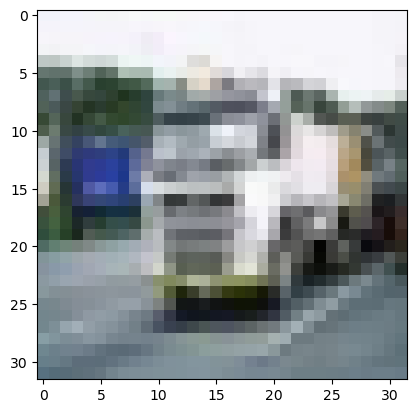

In [14]:
#Taking an index in the image data and displaying it
i=1000 #image index in the dataset
plt.imshow(x_train[i]) #imshow means image show

In [15]:
#shows the class the image belongs to. So basically,
#the 10 images considered are into 10 different classes and printing
#the y would show the class it belongs to
print(y_train[i])

[9]


[9]


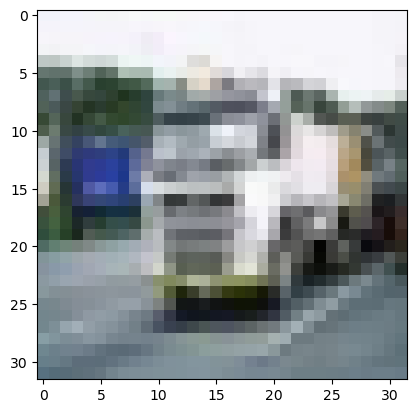

In [16]:
#putting the two previous cells together
i=1000 #image index in the dataset
plt.imshow(x_train[i])
print(y_train[i])

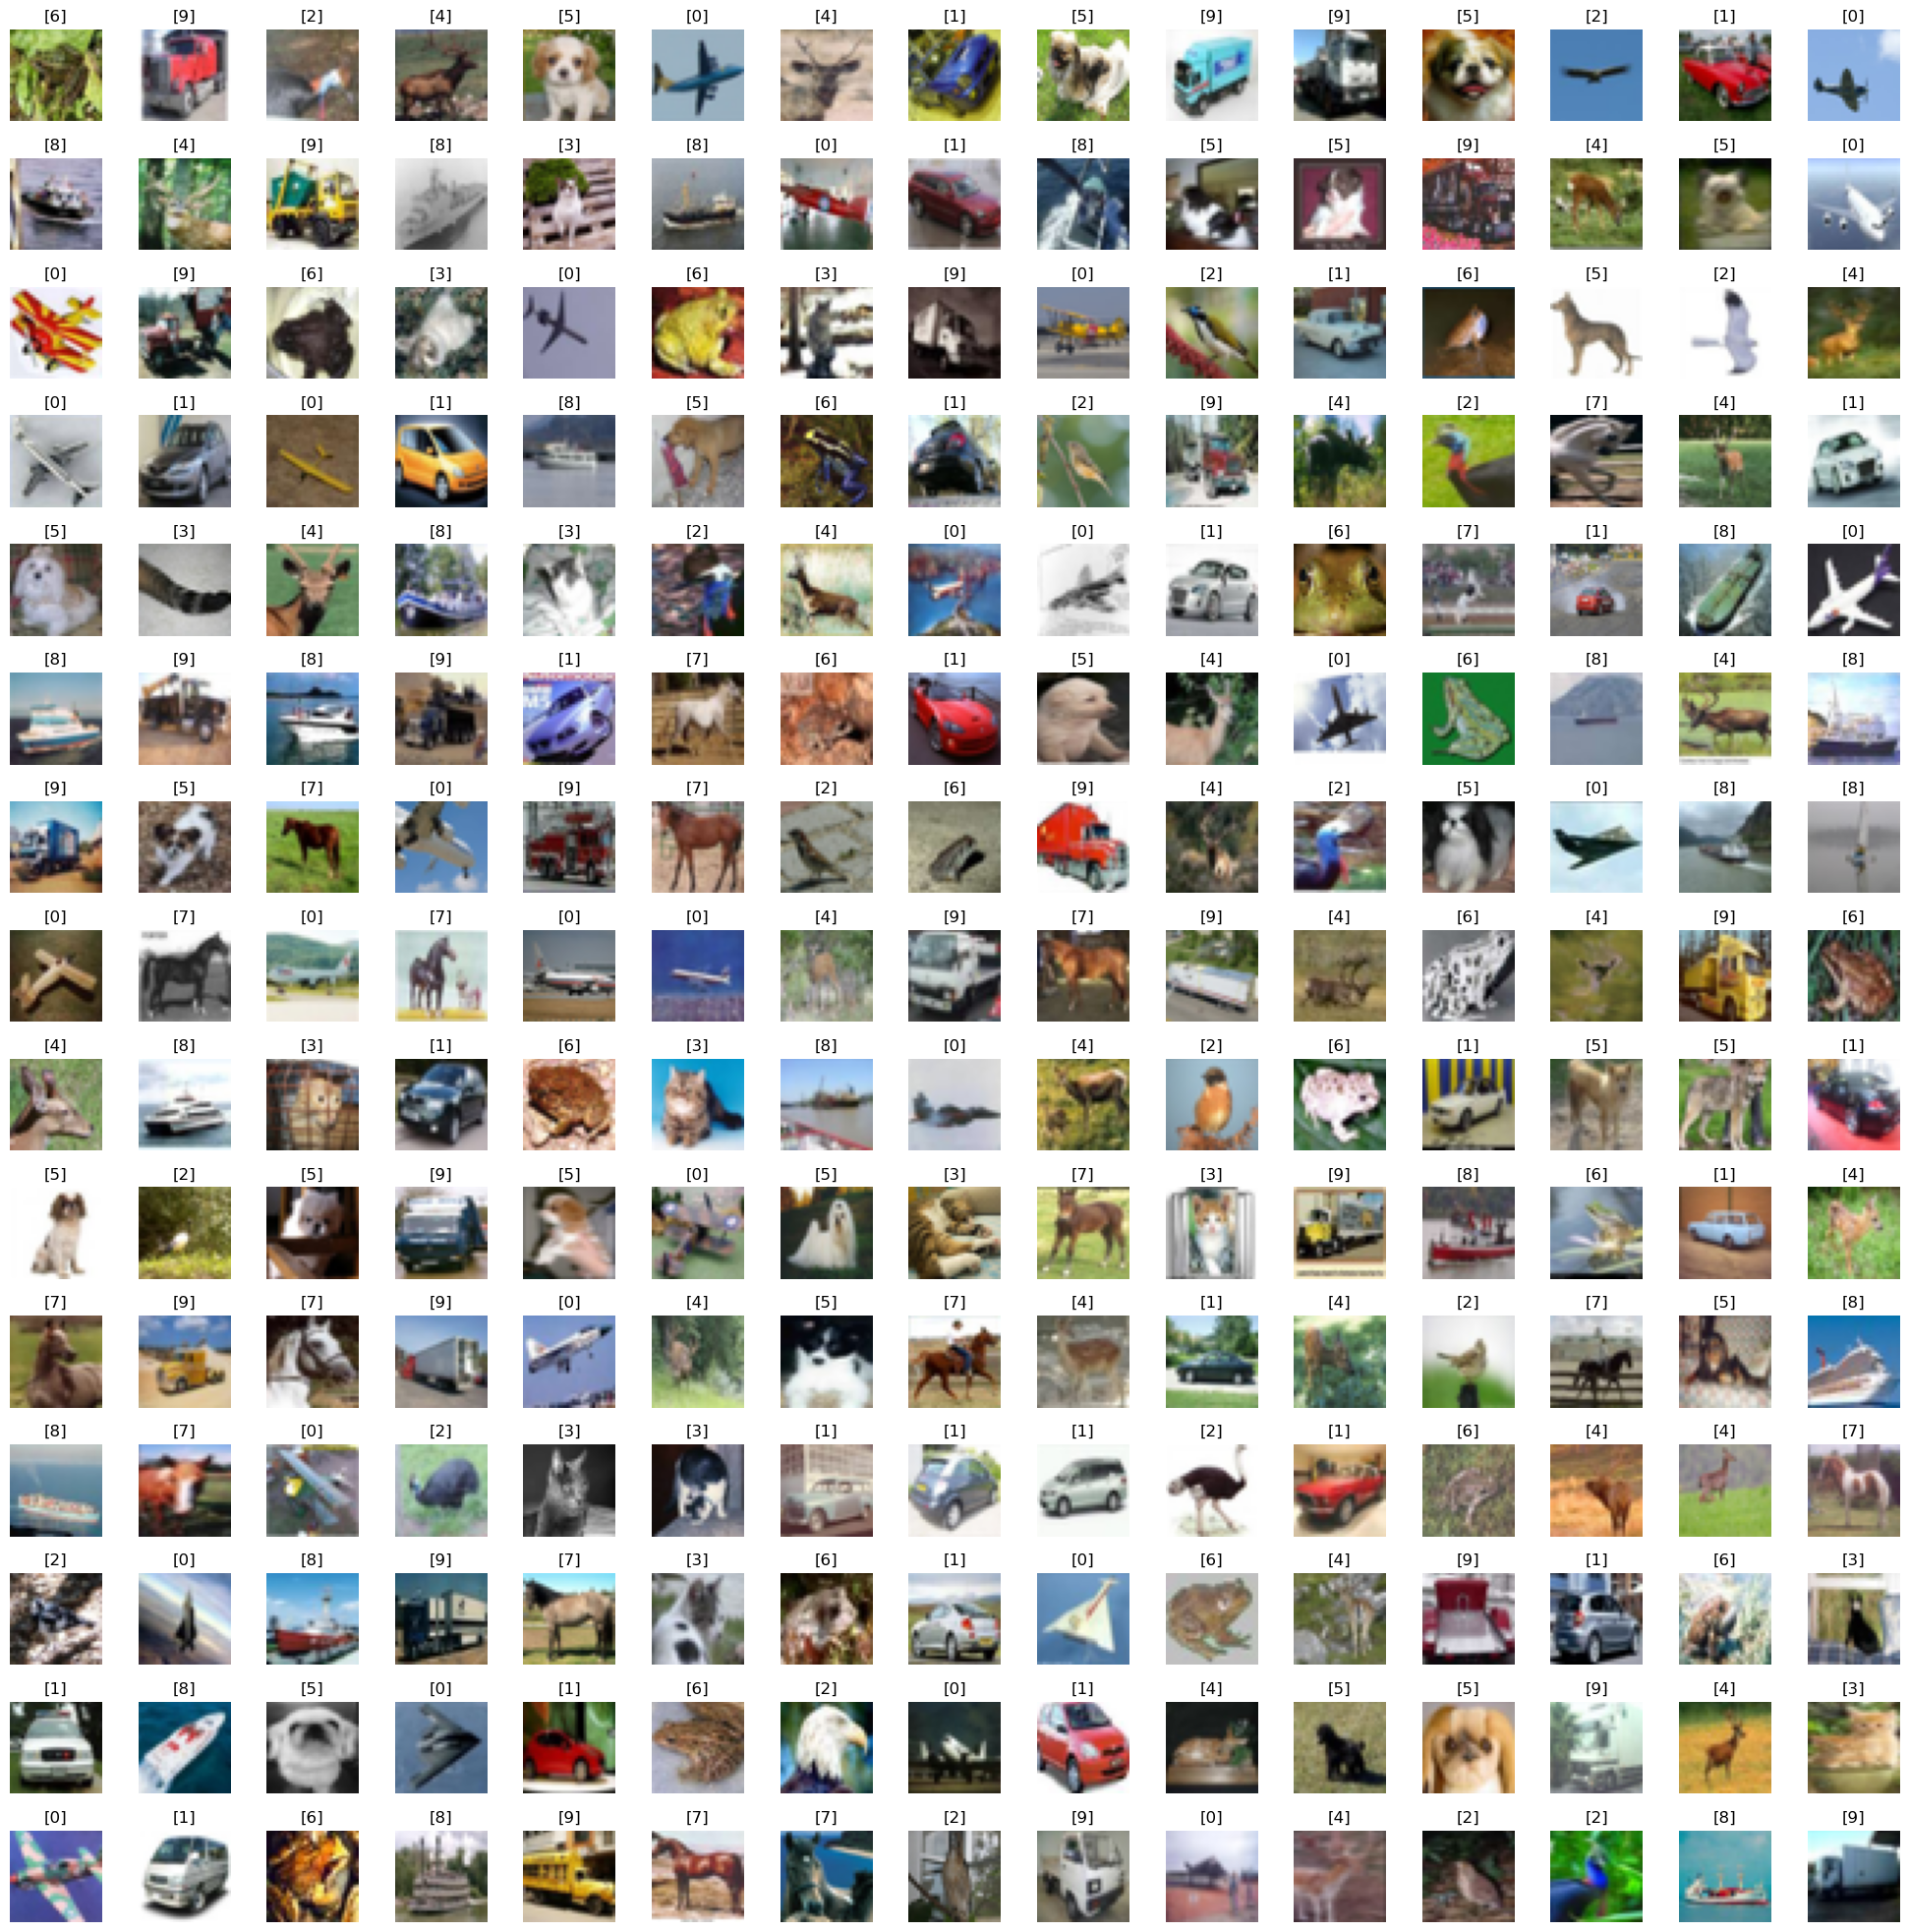

In [17]:
#Printing a matrix of the images

#Create a grid
w_grid=15
l_grid=15
fig, axes=plt.subplots(l_grid,w_grid, figsize=(25,25)) #axes would enable us to manipulate images at specific points

#ravel is used to flatten the matrix
axes=axes.ravel()

#get the length of the training data
n_training=len(x_train)

#create a forloop that plots an image in all the grids
for i in np.arange(0, l_grid*w_grid):
    index=np.random.randint(0,n_training) #takes any random image
    axes[i].imshow(x_train[index])
 #removing the numbers at the edge of each image
    axes[i].axis('off')
#add the corresponding label/classof the image at the top of each image
    axes[i].set_title(y_train[index]) #'cos y_train contains the actual class of each image
#to give more spacing between each image
plt.subplots_adjust(hspace=0.4)


**Preparation of Data**

In [19]:
#1) Converting the images to a float type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#2)How many categories do I have?
number_cat=10


In [20]:
#3) Converting the decimal numbers in y_train to cataegorical data
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [21]:
import keras
y_train=keras.utils.to_categorical(y_train, number_cat)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_test=keras.utils.to_categorical(y_test, number_cat)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
#4) Data Normalization
x_train=x_train/255 #(cos the highest valueos 255 that's the reqsosn for the division with 255)
x_test=x_test/255

In [26]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [27]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
input_shape=x_train.shape[1:] #this does not return the number of the total images in the training data but only the dimension
input_shape 

(32, 32, 3)

**Training**

In [31]:
#Building the model in a sequential pattern (building blocks from the left to the right hand side)
from keras.models import Sequential #keras is an API that sits on Tensorflow, owned by google, useful for DNN, it will use TF as backend
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
#MaxPooling2D will be useful for downsampling (Max of the pixels in the filters, Average find the average,...
#Dense for fully connected NN, Flatten will be used to flatten our array/feature map #Dropout for some regularization
#Adam optimizer to perform optimization #Tensorboard for callback at the backend

In [33]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape)) # start adding layers,kernel_size =kernel dimension
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))#output from the previous will be an input to this layer
cnn_model.add(MaxPooling2D(2,2)) #Adding maxpooling layer
cnn_model.add(Dropout(0.4)) #Add a dropout for regularization

cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2)) #Adding maxpooling layer
cnn_model.add(Dropout(0.3)) #Add a dropout for regularization

#After convolution we  perform flattening
cnn_model.add(Flatten())

#Then add the fully connectedneural network
cnn_model.add(Dense(units=512, activation='relu')) #512 is the no of neurons

#you can choose to add dropout or not

#Let's add another hidden layer with the same number of neurons
cnn_model.add(Dense(units=512, activation='relu'))

#Let's build our output layer
cnn_model.add(Dense(units=10, activation = 'softmax')) #softmax will be ideal instead of relu, #10 because there are 10 classes



In [44]:
#Compiling our model
cnn_model.compile(loss='categorical_crossentropy', optimizer = RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
#Fitting our training data to our model
history=cnn_model.fit(x_train,y_train, batch_size=32, epochs=2, shuffle=True) #history is like an object or variable that captures all the progression of the netweork as it is being trained

Epoch 1/2
 598/1563 [==========>...................] - ETA: 9:54 - loss: 1.9767 - accuracy: 0.2666

**Evaluating the Model**

In [ ]:
#You evealuate your model on your testing data
evaluation = cnn_model.evaluate(x_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
#performing some predictions
predictions=cnn_model.predict(x_test)
predicted_classes=predictions.argmax(axis=-1)
predicted_classes

In [ ]:
#now compare with the true label/y test
y_test

In [ ]:
#y_test=y_test.argmax(axis=1)
#y_test
y_test.shape

In [ ]:
print(y_test.shape)

In [ ]:
y_test=y_test.argmax(1)

In [ ]:
y_test

In [ ]:
y_test.shape

In [ ]:
#Creating a matrix again
L=8
W=8
fig, axes = plt.subplots(L,W,figsize=(16,16))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True={}'. format(predicted_classes[i], y_test[i]))#\n written in a new line
#to give more spacing between each image
plt.subplots_adjust(hspace=0.8) # I can also vary wspace

In [ ]:
#Now plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test, predicted_classes)
cm

#visualizing in a better format
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

**Saving this model**

In [ ]:
import os
directory=os.path.join(os.getcwd(), 'savedcnndnn_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory, 'classification_deepnn_cifar10_trained_model.h5')
cnn_model.save(model_path)

**Extra Research by Me****
To load the saved trained_model in the future in various paltforms

**1** Keras or Tensorflow
from tensorflow.keras.models import load_model

 Load the model from the saved .h5 file
model_path = 'savedcnndnn_models/classification_deepnn_cifar10_trained_model.h5'
model = load_model(model_path)

Now you can use the model for predictions or further training
model.summary()  # To see the model architecture

**2**  Jupyter Notebook
from tensorflow.keras.models import load_model

Define the model path
model_path = 'savedcnndnn_models/classification_deepnn_cifar10_trained_model.h5'

Load the model from the .h5 file
model = load_model(model_path)

Use the model for evaluation, prediction, etc.
model.evaluate(x_test, y_test)  # Example of evaluating the model

**3** Using the Model in Other Frameworks (e.g., PyTorch)
 Convert Keras model to ONNX format using the tf2onnx tool or other available conversion methods.

**4** Sharing the .h5 Model
You can share the .h5 model by simply sending the model file (classification_deepnn_cifar10_trained_model.h5). Anyone with access to this file, 
along with the appropriate libraries, can load and use the model on their system as shown above.

**Improving the Model with Data Augmentation**

Image augmentation means raising image variations artificially within a dataset through enlarging, flipping, changing the brightness, shifting, or rotating the initial images.

This is aimed at exploring some of the properties of the data in order to improve the performance of the process



In [ ]:
import keras
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
#convert the data into float format
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
#visualizing the dimensions of our image
x_train.shape

In [ ]:
#choosing a number of base images
n=8
x_train_sample=x_train[:n]#get me a number of n images

In [ ]:
#checking the shape of the sample
x_train_sample.shape

Now let's apply the transformation to only the samples from the original x_train

In [ ]:
#create image data generator
from keras.preprocessing.image import ImageDataGenerator
datagen_train=ImageDataGenerator(rotation_range=90)# rotatae the image 
datagen_train.fit(x_train_sample)

Now to create different variations through aplying different transformation to the selcted images 

In [ ]:
# from scipy.misc import toimage

# fig=plt.figure(figsize=(20,2))
# for x_batch in datagen_train.flow(x_train_sample, batch_size=n):
#     for i in range(0,n):
#         ax=fig.add_subplot(1, n, i+1)
#         ax.imshow(toimage(x_batch[i])) #everytime go to my batch and create image
#     fig.suptitle('Augmented images (rotated 90 degrees)')
#     plt.show()
#     break;

from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 2))

for x_batch in datagen_train.flow(x_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        # Convert the numpy array to an image using PIL
        ax.imshow(Image.fromarray(x_batch[i].astype('uint8')))  # Ensure the image data is in uint8 format
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break


**Training Model with Augmented Data/Images**

In [ ]:
datagen=ImageDataGenerator(
                            rotation_range=90,
                            width_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True,
    
    
)

In [ ]:
datagen.fit(x_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epoch=2)

In [ ]:
score=cnn_model.evaluate(x_test, y_test)
print('Test acuracy', score[1])

SAVE THE MODEL

In [ ]:
import os
directory=os.path.join(os.getcwd(), 'savedcnndnn_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory, 'aug_classification_deepnn_cifar10_trained_model.h5')
cnn_model.save(model_path)